In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import text as keras_text, sequence as keras_seq

Using TensorFlow backend.


In [2]:
from keras.models import Sequential,Model,Input,load_model
from keras.layers import LSTM,Dense,TimeDistributed,Activation,MaxPooling2D,Embedding,RepeatVector,Flatten,Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD

In [23]:
data=pd.read_csv('test-bp.csv')  ## read the file

In [24]:
#data.describe()

In [25]:
seq=data["0"]    ## sequence 

In [26]:
y=data.iloc[:,1:]  ## target values

In [27]:
sequence=[]
Length_seq=[]
for ix in range(len(seq)):
    inter_seq=[]
    Seq=seq[ix]
    le=len(Seq)
    k=0
    for ixx in range(int(le/3)):
        f=Seq[k:k+3]
        inter_seq.append(f)
        k=k+3
    Length_seq.append(len(inter_seq))
    sequence.append(inter_seq)

In [28]:
sequence=np.array(sequence)

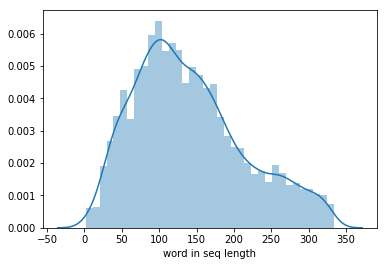

In [29]:
sns.distplot(Length_seq,axlabel="word in seq length")

In [23]:
#words = list(model.wv.vocab)
#print(words)

In [30]:
from keras.preprocessing.text import Tokenizer
tok = Tokenizer(char_level = False)
t=tok.fit_on_texts(sequence)
list_tokenized_train = tok.texts_to_sequences(sequence)
X = keras_seq.pad_sequences(list_tokenized_train, maxlen=350,padding="post") #maxlen padding 100

In [3]:
model=load_model("final_char.hdf5")        ###### load model

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 350, 100)          800100    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 932)               60580     
Total params: 902,920
Trainable params: 902,920
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='3model.png', show_shapes=True)

In [33]:
y_prd=model.predict(X)    ##predict the model

In [35]:
import numpy as np

In [36]:
def Make(Y_ped,threshold_define):
    Y_ped[Y_ped>=threshold_define]=1
    Y_ped[Y_ped<threshold_define]=0
    return Y_ped


In [91]:
y_temp=y_prd.copy()
Y_pred=Make(y_temp,0.2)

In [92]:
from sklearn.metrics import hamming_loss

def metrics(Y_predicted, Y_test):
    totalPrecision = 0.0
    totalRecall = 0.0
    totalF1Score = 0.0
    for i in range(Y_test.shape[0]):
        truePositive = 0.0
        trueNegative = 0.0
        falsePositive = 0.0
        falseNegative = 0.0
        precision = 0.0
        recall = 0.0
        for j in range(Y_test.shape[1]):
            if Y_predicted[i,j] == 1:
                if Y_test[i,j] == 1:
                    truePositive = truePositive + 1
                    #print(truePositive)
                else:    
                    falsePositive = falsePositive + 1
                    #print(falsePositive)
            else:
                if Y_test[i,j] == 1:
                    falseNegative = falseNegative + 1
                    #print(falseNegative)
                else:
                    trueNegative = trueNegative + 1
                    #print(trueNegative)
        try:
            precision = truePositive/(truePositive + falsePositive)
            #print(truePositive,falsePositive,precision)
        except ZeroDivisionError:
            precision = 0.0              
         
        totalPrecision = totalPrecision + precision
        try:
            recall = truePositive/(truePositive + falseNegative)
        except ZeroDivisionError:
            recall = 0.0
         
        totalRecall = totalRecall + recall
        try:
            f1Score = 2 * precision * recall / (precision + recall)
        except:
            f1Score = 0.0
        totalF1Score = totalF1Score + f1Score
         
    avgPrecision = totalPrecision / (Y_test.shape[0])
    avgRecall = totalRecall / (Y_test.shape[0])
    avgF1Score = totalF1Score / (Y_test.shape[0])
    #print("optimizer=Adam,epochs=300,batch_size=32")
    #print("Average Precision : " + str(avgPrecision))
    #print(avgPrecision)
    #print("Average Recall : "  + str (avgRecall))
    #print(avgRecall)
    #print("Average F1-Score : " + str(avgF1Score))
    #print(avgF1Score)
    F1Score = ( 2 * avgPrecision * avgRecall ) / ( avgPrecision + avgRecall )
    #print("F1-score : " + str(F1Score))
    hammingLoss = hamming_loss(Y_predicted, Y_test)
    #print("Hamming Loss : " + str(hammingLoss))
    return avgPrecision, avgRecall, avgF1Score, F1Score, hammingLoss
    #print(classification_report(Y_test ,Y_predicted ))

In [93]:
metrics(Y_pred, y.values)

(0.2267532869878371,
 0.23075495289870177,
 0.17629363708737036,
 0.22873661935129522,
 0.05273246552745913)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y.values,Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       182
           4       0.00      0.00      0.00        50
           5       0.00      0.00      0.00        50
           6       0.00      0.00      0.00        51
           7       0.00      0.00      0.00        51
           8       0.00      0.00      0.00       119
           9       0.00      0.00      0.00       122
          10       0.00      0.00      0.00       123
          11       0.00      0.00      0.00        59
          12       0.00      0.00      0.00        70
          13       0.00      0.00      0.00       113
          14       0.00      0.00      0.00       113
          15       0.00      0.00      0.00        84
          16       0.00      0.00      0.00       123
          17       0.03    

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)
